In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [28]:
#--------- Pandas Dataframe
## Read in CSVhttp://localhost:8888/notebooks/OneDrive/Documents/Data%20Science/Projects/PUBG_EDA_Clustering/assets/PUBG_logo.png
orig = pd.read_excel('/Users/dagobertoborre/Documents/Diplomado/Base_COD.xlsx')

In [29]:
orig.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.00000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1.282000e+03,1282.000000,1.282000e+03,1282.000000
mean,185.921217,4560.980499,0.774258,8.379875,53.76131,6.072543,56.692668,12554.159126,517.508580,766.449298,141.818253,833.431357,55121.117785,1.060483e+06,130.455858,6.767516e+04,4709.506240
std,323.606918,8528.773241,0.344874,10.659590,71.96835,7.289179,51.645801,24748.156401,838.963177,1402.242161,276.245584,1636.792735,105429.724045,1.928776e+06,116.106982,1.295096e+05,8585.815285
min,0.000000,1.000000,0.024390,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000e+00,0.000000
25%,1.000000,36.250000,0.522019,0.000000,5.00000,1.000000,0.000000,0.000000,18.000000,7.000000,0.000000,5.000000,0.000000,1.729625e+04,0.000000,0.000000e+00,70.000000
50%,34.000000,615.000000,0.834658,8.000000,22.00000,4.000000,45.000000,1104.000000,121.500000,106.000000,14.500000,111.000000,5545.000000,1.792825e+05,128.388053,6.482500e+03,724.000000
75%,244.000000,5226.000000,0.987955,13.000000,74.00000,9.000000,110.000000,13286.250000,688.000000,906.250000,165.000000,850.750000,62238.250000,1.167748e+06,237.771348,7.563675e+04,5466.500000
max,3519.000000,66935.000000,3.000000,235.000000,435.00000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [30]:
print(df)
print(df.dtypes)

                          name  wins  kills   kdRatio  killstreak  level  \
0     Christian24Ramos#9910128     0   2972  1.188325           0    128   
1         Stone Island#4702149     0   1695  0.968571           0    112   
2             Hoss2422#8165512    16   1531  0.730091           0     74   
3          Persian Don#8581151     0    887  0.939619           0     48   
4              Armiiin#4020761     0    852  0.972603           0     45   
...                        ...   ...    ...       ...         ...    ...   
1277    Diegoortiz2050#1974630     7      7  0.184211           2      1   
1278     boondoks_gang#3234092     0      1  0.076923           1      1   
1279         usmigal66#6816012     3      3  0.136364           1      1   
1280   goodgoodjones17#1655197     4      1  0.024390           1      1   
1281          GWBDOE92#1356084     1      1  0.050000           1      1   

      losses  prestige  hits  timePlayed  headshots  gamesPlayed  assists  \
0         

In [25]:
#df['scorePerMinute'] = df['scorePerMinute'].apply(np.int64)

In [31]:
#---------Preprocessing
## Create a copy of the dataframe
df = orig.copy()

Split the data into three sets: train, dev, and test set.

In [32]:
# Create train and test set using Sci-Kit Learn
train, test = train_test_split(df, test_size=0.3, random_state = 10)
dev, test = train_test_split(test, test_size = 0.2, random_state = 10)
data = train

print("The number of training samples is", len(train))
print("The number of development samples is", len(dev))
print("The number of testing samples is", len(test))

The number of training samples is 897
The number of development samples is 308
The number of testing samples is 77


It is important we go through the final output to make sure that the data preprocessing is complete. And it looks great!

In [17]:
with pd.option_context('display.max_columns', 16):
    print(data.describe(include = 'all'))

                    name         wins         kills     kdRatio  killstreak  \
count                897   897.000000    897.000000  897.000000  897.000000   
unique               897          NaN           NaN         NaN         NaN   
top     HerrCron#9655126          NaN           NaN         NaN         NaN   
freq                   1          NaN           NaN         NaN         NaN   
mean                 NaN   188.704571   4684.625418    0.770626    8.130435   
std                  NaN   331.385984   8784.664577    0.348270    7.258288   
min                  NaN     0.000000      1.000000    0.024390    0.000000   
25%                  NaN     2.000000     35.000000    0.514286    0.000000   
50%                  NaN    34.000000    663.000000    0.842105    8.000000   
75%                  NaN   251.000000   5228.000000    0.980174   13.000000   
max                  NaN  3519.000000  66935.000000    3.000000   54.000000   

             level      losses    prestige  ...    

The only factors above which have a positive correlation to average survival time are kdratio, headshots, and Wins.

PART 2 - Clustering
Procedure:

3D
Two Clusters
Four Clusters
2D
Two Clusters
Four Clusters

In [33]:
# Select four features
train_data = train.loc[:,['kdRatio', "headshots", 'wins' , "shots"]]
dev_data = dev.loc[:,['kdRatio', "headshots", 'wins' , "shots"]]
test_data = test.loc[:,['kdRatio', "headshots", 'wins' , "shots"]]

Feature scaling is utilized to make sure all features are normalized and have similar orders of magnitude. This is important because our clustering algorithms look into calculating the distance between points. In our case, we employed a zero-mean and unit-variance scaling.

In [34]:
# Scale the data (Normaliz)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(train_data)
X_dev_std = scaler.transform(dev_data)
X_test_std = scaler.transform(test_data)

K-means clustering
K-means clustering is an algorithm to classify or to group objects based on attributes/features into K number of groups [1]. The grouping is done by minimizing the sum of square of distances between data and the corresponding cluster centroid.

Algorithm
Select K points randomly from the dataset as the centroids of the clusters.
Assign data points to centroids closest to it.
Recompute the centroid so that it is closest to all the data points allocated to that cluster.
Repeat step 2 and 3 until the algorithm converges.
Parameters
In K-means clustering, we'll be examining two parameters:

How clusters are initialized
The number of clusters
Initialization
Standard k-means clustering has a challenge initializing the cluster centroids. If a wrong cluster initialization is set, the clusters will be wrong. We'll be using the K-means +++ initialization to solve this issue by first initializing the cluster centroids before following the standard k-means clustering algorithm.

The first cluster is chosen uniformly at random from the data points that we want to cluster. This is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here
Compute the distance (D(x)) of each data point (x) from the cluster center that has already been chosen
Choose the new cluster center from the data points with the probability of x being proportional to (D(x))2
Repeat steps 2 and 3 until k clusters have been chosen
Optimal Number of Clusters
Now, we'll want to identify the optimal number of clusters [2]. We'll use the inertia between clusters and silhouette analysis as our internal scoring metrics because we do not have access to correctly labeled data.

Inertia is the within-cluster sum of squares. It calculates the variance of points in each cluster.

Silhouette Analysis measures the similarity of points in a cluster and the dissimilarity of points in neighboring clusters.

For our problem, SA provides a better solution because we are not looking for how points are similar in each cluster, but how they are separated.

We plot the number of clusters vs the inertia, to identify the optimal number of clusters by selecting the number that is the elbow-point in the graph, or the point in which the graph doesn't have a steep slope.

The elbow point is 4, but 5 or 6 are adequate choices too.

Inertia for 1 Clusters: 3588.0000
Inertia for 2 Clusters: 1794.7419
Inertia for 3 Clusters: 1234.7717
Inertia for 4 Clusters: 891.5717
Inertia for 5 Clusters: 729.2172
Inertia for 6 Clusters: 621.7054
Inertia for 7 Clusters: 549.1679
Inertia for 8 Clusters: 487.3361
Inertia for 9 Clusters: 441.4571


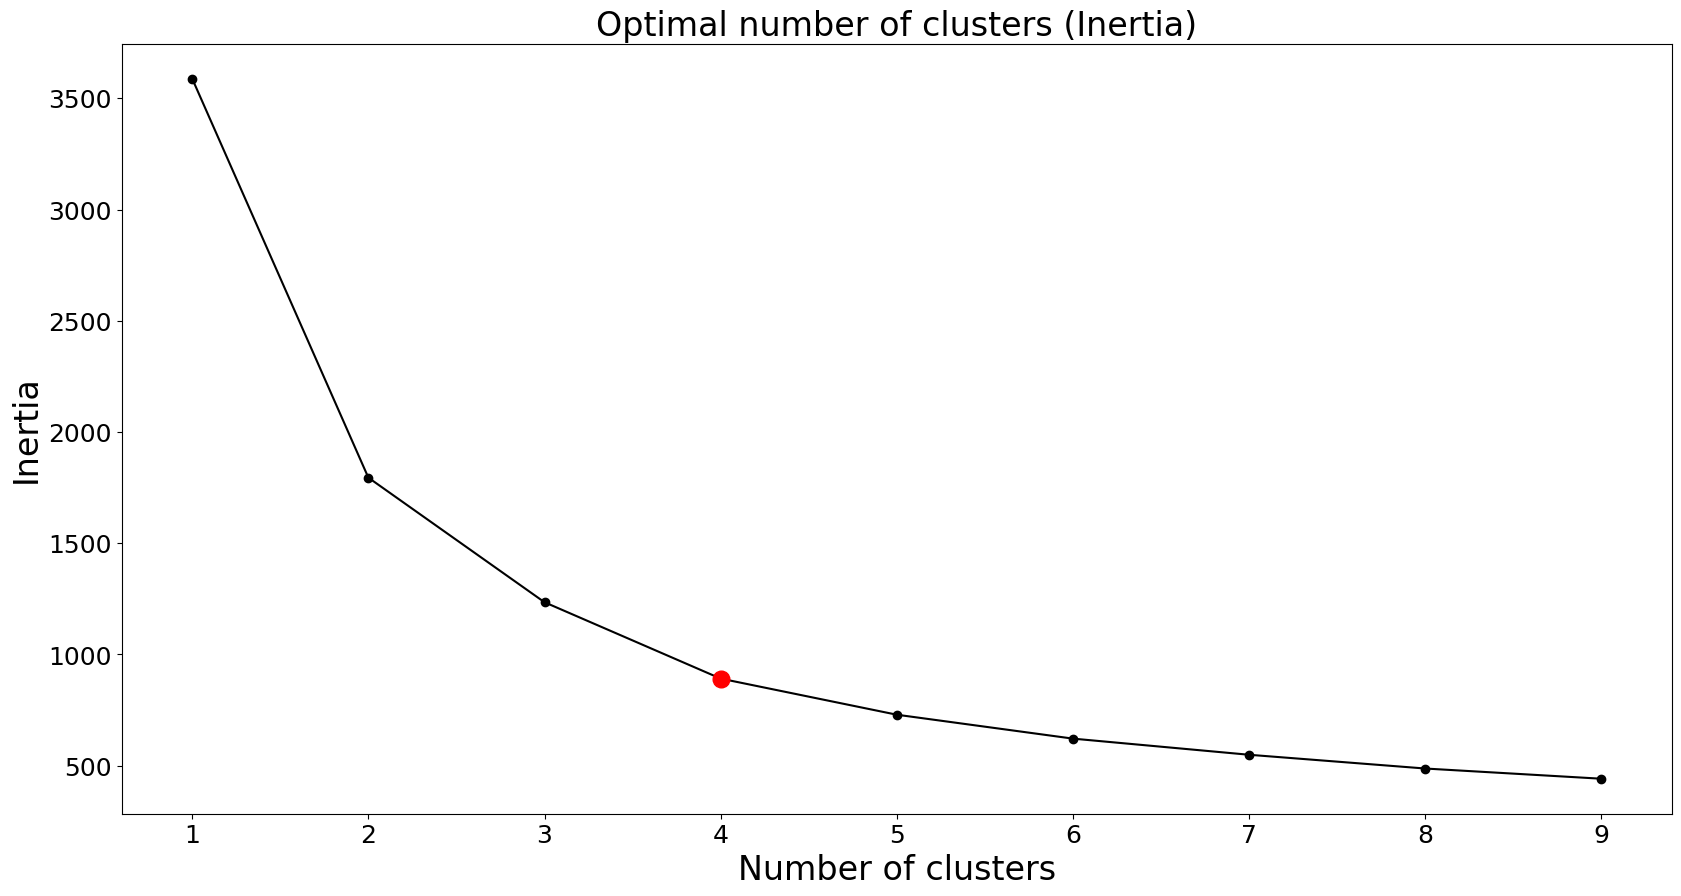

In [35]:
# The number of clusters from 1 to 10
ks = range(1, 10)

inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', random_state = 10)
    
    # Fit model to samples
    model.fit(X_train_std)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    print('Inertia for %i Clusters: %0.4f' % (k, model.inertia_))

# Plot parameters
plt.figure(figsize = (20, 10))
plt.plot(ks, inertias, '-o', color = 'black')
plt.plot(4, inertias[3], '-o', color = 'red', markersize = 12)
plt.xlabel('Number of clusters', fontsize = 24)
plt.ylabel('Inertia', fontsize = 24)
plt.title('Optimal number of clusters (Inertia)', fontsize = 24)
plt.xticks(ks, fontsize = 18)
plt.yticks(fontsize = 18)



plt.show()

In [ ]:
Silhouette analysis studies how similar and dissimilar neighboring cluster centroids are. We select the point which is closest to +1. In our case, two clusters have the greatest value following with four clusters.

Being able to distinguish between a player and a hacker by having two clusters is the perfect solution. But from my experience, I feel there would be more segmentation than a cheater and a player such as

Beginner
Experienced
Professional
Hacker
Nevertheless, we will explore all possible outcomes.


Silhouette Score for 2 Clusters: 0.5826
Silhouette Score for 3 Clusters: 0.4423
Silhouette Score for 4 Clusters: 0.4809
Silhouette Score for 5 Clusters: 0.4726
Silhouette Score for 6 Clusters: 0.4593
Silhouette Score for 7 Clusters: 0.4409
Silhouette Score for 8 Clusters: 0.3880
Silhouette Score for 9 Clusters: 0.4204


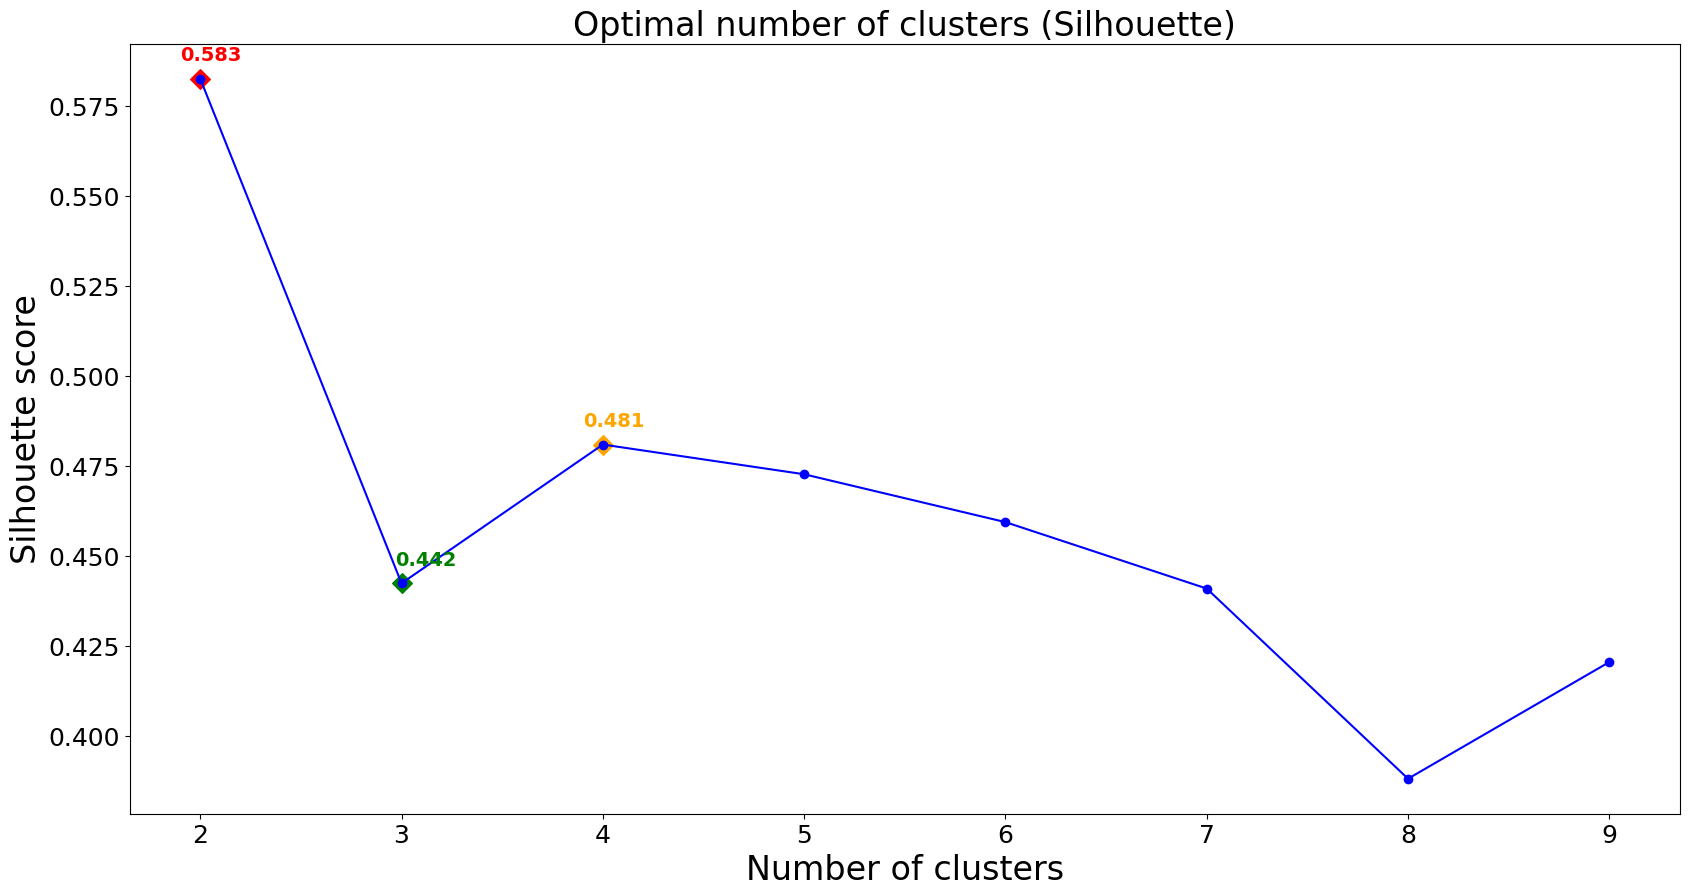

In [37]:
# Number of clusters
ks = range(2, 10)
score = []

# Silhouette Method
for k in ks:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 10).fit(X_train_std)
    ss = metrics.silhouette_score(X_train_std, kmeans.labels_, sample_size = 100)
    score.append(ss)
    print('Silhouette Score for %i Clusters: %0.4f' % (k, ss))

# Plot Parameters
plt.figure(figsize = (20, 10))
plt.plot(ks, score, '-o', color = 'blue')
s = ['D', 'D', 'D' ]
col = ['red','green','orange' ]
x = np.array([2, 3, 4, 3])
y = score[0:3]
plt.xticks(ks, fontsize = 18)
plt.yticks(fontsize = 18)

## Different Markers for first three points
for _s, c, _x, _y in zip(s, col, x, y):
    plt.scatter(_x, _y, marker=_s, c=c, s = 100)
plt.xlabel("Number of clusters", fontsize = 24)
plt.ylabel("Silhouette score", fontsize = 24)
plt.title('Optimal number of clusters (Silhouette)', fontsize = 24)

plt.text(1.90, score[0] + 0.005, str(round(score[0], 3)), size = 14, color = 'red', weight = 'semibold')

plt.text(2.97, score[1] + 0.005, str(round(score[1], 3)), size = 14, color = 'green', weight = 'semibold')

plt.text(3.90, score[2] + 0.005, str(round(score[2], 3)), size = 14, color = 'orange', weight = 'semibold')



plt.show()